Number of data points on June 5th: 24

Hourly Results for ENTSO-E Forecast - June 5, 2019:
 Hour  Actual Load (MW)  Predicted Load (MW)  Absolute Error (MW)  Percentage Error (%)
    0           46510.0              42264.0               4246.0                  9.13
    1           45963.0              42333.0               3630.0                  7.90
    2           46954.0              43311.0               3643.0                  7.76
    3           49548.0              46270.0               3278.0                  6.62
    4           57040.0              53399.0               3641.0                  6.38
    5           63757.0              58923.0               4834.0                  7.58
    6           66735.0              61450.0               5285.0                  7.92
    7           67076.0              62796.0               4280.0                  6.38
    8           69040.0              64260.0               4780.0                  6.92
    9           70194.0      

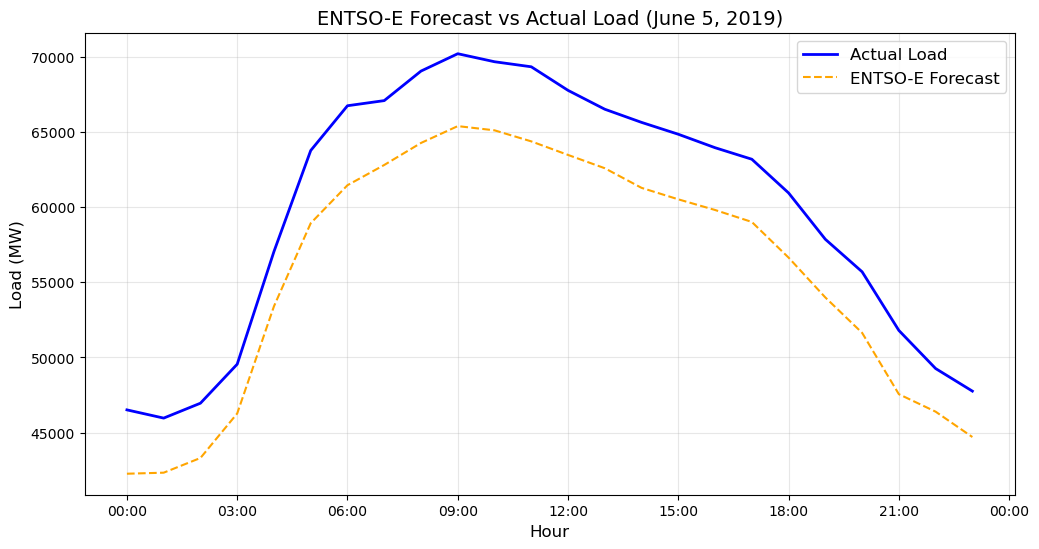

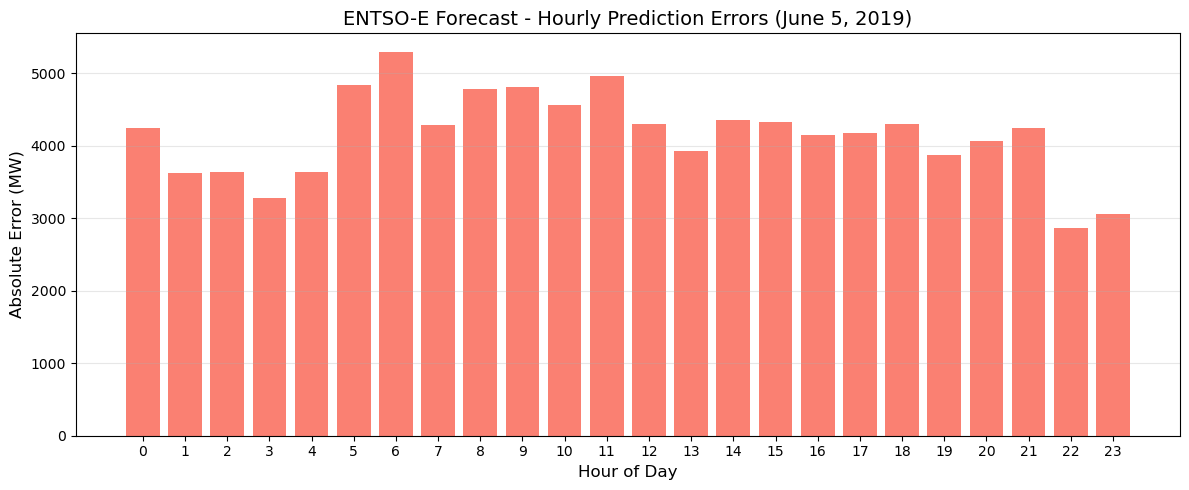

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the cleaned dataset
file_path = '../data/germany_cleaned_load_data.csv'
df = pd.read_csv(file_path, parse_dates=['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)

# Filter for 5 June 2019
specific_date = '2019-06-05'
start = f'{specific_date} 00:00:00'
end = f'{specific_date} 23:00:00'
june_5th_data = df.loc[start:end]

print(f"Number of data points on June 5th: {len(june_5th_data)}")

# Create a DataFrame with hourly results
hourly_results = pd.DataFrame({
    'Hour': june_5th_data.index.hour,
    'Actual Load (MW)': june_5th_data['DE_load_actual_entsoe_transparency'].values,
    'Predicted Load (MW)': june_5th_data['DE_load_forecast_entsoe_transparency'].values
})

# Calculate hourly errors
hourly_results['Absolute Error (MW)'] = abs(hourly_results['Actual Load (MW)'] - hourly_results['Predicted Load (MW)'])
hourly_results['Percentage Error (%)'] = (hourly_results['Absolute Error (MW)'] / hourly_results['Actual Load (MW)']) * 100

# Format to 2 decimal places for better readability
hourly_results['Actual Load (MW)'] = hourly_results['Actual Load (MW)'].round(2)
hourly_results['Predicted Load (MW)'] = hourly_results['Predicted Load (MW)'].round(2)
hourly_results['Absolute Error (MW)'] = hourly_results['Absolute Error (MW)'].round(2)
hourly_results['Percentage Error (%)'] = hourly_results['Percentage Error (%)'].round(2)

# Display the hourly results as a table
print(f"\nHourly Results for ENTSO-E Forecast - June 5, 2019:")
print(hourly_results.to_string(index=False))

# Calculate summary statistics
avg_error = hourly_results['Absolute Error (MW)'].mean()
max_error = hourly_results['Absolute Error (MW)'].max()
max_error_hour = hourly_results.loc[hourly_results['Absolute Error (MW)'].idxmax(), 'Hour']
min_error = hourly_results['Absolute Error (MW)'].min()
min_error_hour = hourly_results.loc[hourly_results['Absolute Error (MW)'].idxmin(), 'Hour']

print(f"\nSummary Statistics for June 5, 2019:")
print(f"Average Absolute Error: {avg_error:.2f} MW")
print(f"Maximum Error: {max_error:.2f} MW (Hour {max_error_hour})")
print(f"Minimum Error: {min_error:.2f} MW (Hour {min_error_hour})")

# Calculate overall metrics
actual = june_5th_data['DE_load_actual_entsoe_transparency']
forecast = june_5th_data['DE_load_forecast_entsoe_transparency']

mae = hourly_results['Absolute Error (MW)'].mean()
mape = hourly_results['Percentage Error (%)'].mean()
rmse = np.sqrt(((actual - forecast) ** 2).mean())
r2 = 1 - ((actual - forecast) ** 2).sum() / ((actual - actual.mean()) ** 2).sum()

print(f"\nENTSO-E Forecast Performance Metrics:")
print(f"MAE: {mae:.2f} MW")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f} MW")
print(f"R² Score: {r2:.4f}")

# Create visualization of hourly actual vs. predicted load
plt.figure(figsize=(12, 6))
plt.plot(june_5th_data.index, june_5th_data['DE_load_actual_entsoe_transparency'], 
         label="Actual Load", color="blue", linewidth=2)
plt.plot(june_5th_data.index, june_5th_data['DE_load_forecast_entsoe_transparency'], 
         label="ENTSO-E Forecast", color="orange", linestyle="dashed")

plt.title(f"ENTSO-E Forecast vs Actual Load (June 5, 2019)", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Load (MW)", fontsize=12)

# Format x-axis to show hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=0)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Visualize hourly errors
plt.figure(figsize=(12, 5))
plt.bar(hourly_results['Hour'], hourly_results['Absolute Error (MW)'], color='salmon')
plt.title(f"ENTSO-E Forecast - Hourly Prediction Errors (June 5, 2019)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Absolute Error (MW)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("ENTSO-E_hourly_errors_20190605.png", dpi=300)
plt.show()